## Analysis of business.json

#### Data loading (153 MB)

In [8]:
import pandas as pd

# read the entire file into a python array
with open('yelp_dataset/yelp_academic_dataset_business.json', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df = pd.read_json(data_json_str)
print("business.json contains %i records, each composed by %i columns." % (df.shape[0], df.shape[1]))

business.json contains 209393 records, each composed by 14 columns.


#### Data preview

In [3]:
df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,10913 Bailey Rd,"{u'BusinessParking': u'{'garage': False, 'stre...",f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,"{u'Monday': u'10:0-18:0', u'Tuesday': u'11:0-2...",1,35.462724,-80.852612,The Range At Lake Norman,28031,36,3.5,NC
1,"8880 E Via Linda, Ste 107","{u'GoodForKids': u'True', u'ByAppointmentOnly'...",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,None,1,33.569404,-111.890264,"Carlos Santo, NMD",85258,4,5.0,AZ
2,3554 Rue Notre-Dame O,None,XNoUzKckATkOD1hP6vghZg,"Pets, Pet Services, Pet Groomers",Montreal,None,1,45.479984,-73.580070,Felinus,H4C 1P4,5,5.0,QC
3,1015 Sharp Cir,"{u'DogsAllowed': u'True', u'BusinessParking': ...",6OAZjbxqM5ol29BuHsil3w,"Hardware Stores, Home Services, Building Suppl...",North Las Vegas,"{u'Friday': u'7:0-16:0', u'Tuesday': u'7:0-16:...",0,36.219728,-115.127725,Nevada House of Hose,89030,3,2.5,NV
4,4827 E Downing Cir,"{u'BusinessAcceptsCreditCards': u'True', u'ByA...",51M2Kk903DFYI6gnB5I6SQ,"Home Services, Plumbing, Electricians, Handyma...",Mesa,"{u'Friday': u'9:0-16:0', u'Tuesday': u'9:0-16:...",1,33.428065,-111.726648,USE MY GUY SERVICES LLC,85205,26,4.5,AZ


#### Top Rated

In [4]:
df.sort_values(by=['stars', 'review_count'], ascending=False).head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
141155,4301 E University Dr,"{u'Alcohol': u'u'none'', u'HasTV': u'True', u'...",Xg5qEQiB-7L6kGJ5F4K3bQ,"Barbeque, Restaurants",Phoenix,"{u'Monday': u'0:0-0:0', u'Tuesday': u'11:0-16:...",1,33.421714,-111.989161,Little Miss BBQ,85034,2329,5.0,AZ
12657,"7380 S Rainbow Blvd, Ste 101","{u'Alcohol': u''none'', u'HasTV': u'False', u'...",IhNASEZ3XnBHmuuVnWdIwA,"Restaurants, Food, Cafes, Tea Rooms, Bubble Te...",Las Vegas,"{u'Monday': u'0:0-0:0', u'Tuesday': u'11:0-22:...",1,36.054227,-115.242392,Brew Tea Bar,89139,1827,5.0,NV
159659,4044 S 16th St,"{u'Alcohol': u''full_bar'', u'HasTV': u'True',...",9MVKjEMN5T59uzG1xoD2BQ,"Restaurants, Mexican",Phoenix,"{u'Monday': u'0:0-0:0', u'Tuesday': u'11:0-21:...",1,33.408767,-112.047381,Cocina Madrigal,85040,1107,5.0,AZ
92710,3645 Las Vegas Blvd S,"{u'DogsAllowed': u'False', u'BusinessAcceptsCr...",Kp4i7on7rxFRkWceKfL2Ig,"Casinos, Magicians, Event Planning & Services,...",Las Vegas,"{u'Sunday': u'16:0-17:15', u'Tuesday': u'16:0-...",1,36.114277,-115.170975,Paranormal - Mind Reading Magic Show,89109,979,5.0,NV
166188,"1038 W Southern Ave, Ste 1","{u'Alcohol': u'u'none'', u'HasTV': u'False', u...",16d3BlncEyCTzb0GxXrBXQ,"Restaurants, Halal, Mediterranean, Sandwiches,...",Mesa,"{u'Monday': u'10:30-22:0', u'Tuesday': u'10:30...",1,33.394446,-111.854111,Green Corner Restaurant,85210,858,5.0,AZ


#### Scatter plot (stars, review_count)

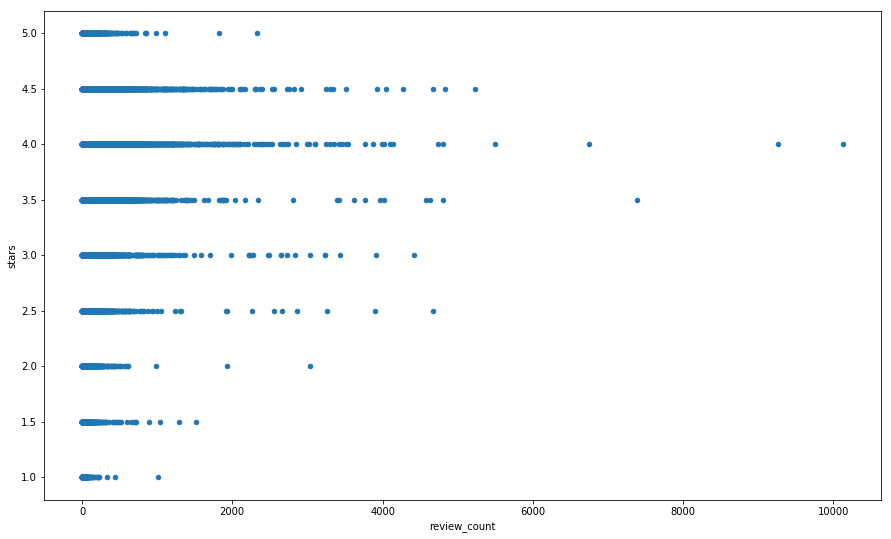

In [10]:
import matplotlib.pyplot as plt

df.plot.scatter(x='review_count', y='stars', figsize=(15,9))
plt.show()

#### Correlation matrix

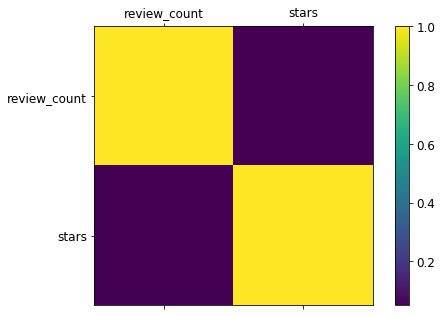

In [15]:
f = plt.figure(figsize=(8, 5))
plt.matshow(df[['review_count', 'stars']].corr(), fignum=f.number)
plt.xticks(range(2), df[['review_count', 'stars']].columns, fontsize=12)
plt.yticks(range(2), df[['review_count', 'stars']].columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)

#### Location of businesses

All of business are located in North America.

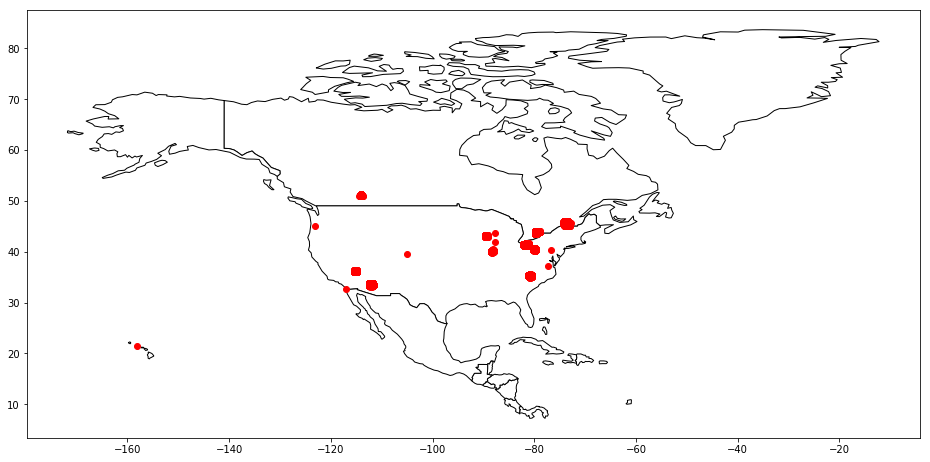

In [7]:
import geopandas

gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(color='white', edgecolor='black', figsize=(16,9))
gdf.plot(ax=ax, color='red', figsize=(16,9))
plt.show()

#### Cities with most businesses

In [18]:
cities = df[['city', 'state', 'stars']]
grouped_cities = cities.groupby(['city', 'state']).size().reset_index(name='count')
grouped_cities.sort_values(by=['count'], ascending=False).head(10)

,city,state,count
495,Las Vegas,NV,31623
1158,Toronto,ON,20364
847,Phoenix,AZ,20170
175,Charlotte,NC,10417
1047,Scottsdale,AZ,9341
143,Calgary,AB,8375
870,Pittsburgh,PA,7630
666,Montréal,QC,6979
616,Mesa,AZ,6577
402,Henderson,NV,5272


#### States with most businesses

In [20]:
states = df[['state']]
grouped_states = states.groupby(['state']).size().reset_index(name='count')
grouped_states.sort_values(by=['count'], ascending=False).head(10)

,state,count
4,AZ,60803
21,NV,39084
24,ON,36627
23,OH,16392
19,NC,16218
26,PA,12376
27,QC,10233
0,AB,8682
34,WI,5525
15,IL,2034


#### Opened business by hour

We want to know the number of businesses that are opened for each hour of the day and for each day of the week.

In [22]:
days_num = {'Monday': 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}
days = ['Monday', "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# Days of the week in rows and hours of the day in columns
timetable = [[0 for x in range(24)] for y in range(7)]
for o in df[['hours']].values:
    # Not all business have opening time
    if o[0] != None:
        week = {}
        for day in o[0]:
            time = o[0][day].split('-')
            opening_hour =  int(time[0].split(':')[0])
            opening_min =  int(time[0].split(':')[1])
            closing_hour =  int(time[1].split(':')[0])
            closing_min =  int(time[1].split(':')[1])
            for i in range(opening_hour, closing_hour):
                timetable[days_num[day]-1][i] = timetable[days_num[day]-1][i] + 1
df_hours = pd.DataFrame(data=timetable, index=days)
df_hours

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,168,178,184,212,669,2837,8179,21440,42352,66896,...,105029,103763,100665,82126,65906,53242,41631,22015,6960,0
Tuesday,152,163,174,206,688,3043,9266,25403,50363,80716,...,129812,127978,124137,102536,80622,63707,48750,25497,7738,0
Wednesday,148,160,165,198,675,3010,9073,25250,50396,81036,...,131375,129935,126447,105183,83427,66203,50913,26544,8073,0
Thursday,157,170,176,205,655,2942,9181,25482,50670,81090,...,130989,129519,125978,105108,85147,67718,51456,26589,8294,0
Friday,203,214,220,247,713,3002,9114,25223,50360,80959,...,125290,123079,118933,98223,77019,61393,48250,28089,10962,0
Saturday,164,173,179,197,466,1794,5664,14978,32339,60115,...,97776,93466,87977,75102,60469,51226,42770,26780,10645,0
Sunday,250,274,279,299,570,1688,4490,10017,17628,27865,...,74964,72758,69488,57987,46407,40121,32860,20292,6545,0


Now we want to plot the table above in a heatmap.

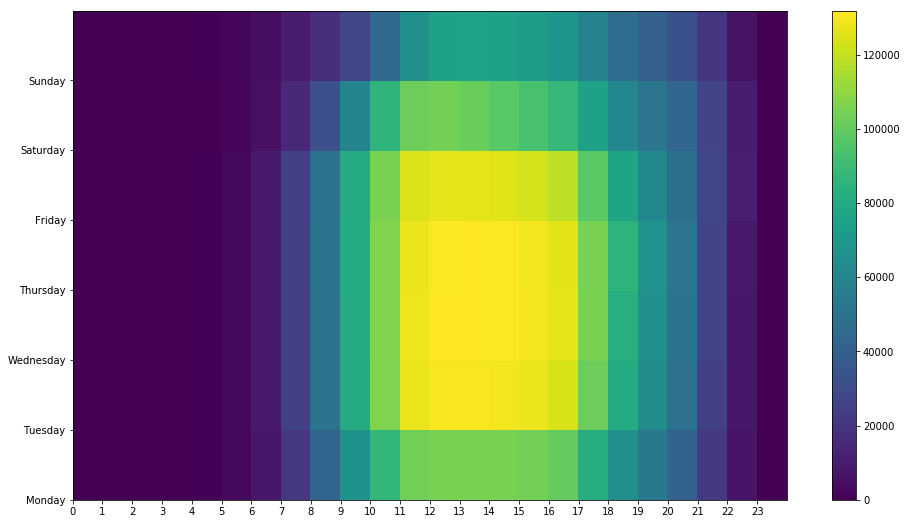

In [104]:
f = plt.figure(figsize=(16, 9))
plt.pcolor(df_hours)
plt.yticks(range(len(df_hours.index)), df_hours.index)
plt.xticks(range(len(df_hours.columns)), df_hours.columns)
plt.colorbar()
plt.show()